In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def f(I_max, I_min):
    return (I_max-I_min)/(I_max + I_min)

In [4]:
f(2.75, 0.25)

0.8333333333333334

In [6]:
f(2.84,0.08)

0.9452054794520548

In [45]:
I_max = np.array([0.99, 0.82, 0.77, 0.74, 0.84, 0.91, 0.97, 1.07, 1.2, 1.22, 1.95, 2.85, 3.00, 2.80, 2.89, 2.55, 2.16, 1.54, 1.01])
I_min = np.array([0.8, 0.48, 0.13, 0.1, 0.06, 0.04, 0.05, 0.09, 0.43, 0.92, 0.54, 0.20, 0.15, 0.14, 0.14, 0.23, 0.56, 0.78, 0.81])
K = f(I_max, I_min)
print(f(I_max, I_min))

[0.10614525 0.26153846 0.71111111 0.76190476 0.86666667 0.91578947
 0.90196078 0.84482759 0.47239264 0.14018692 0.56626506 0.86885246
 0.9047619  0.9047619  0.90759076 0.83453237 0.58823529 0.32758621
 0.10989011]


In [54]:
phi_deg = np.array([0,15,30,45,50,55,60,65,80,95,110,125, 130, 135, 140, 145, 160, 170, 180])
phi_rad = np.deg2rad(phi)

In [58]:
phi_deg.shape, K.shape

((19,), (19,))

In [59]:
def f_sin(x, A):
    return A* np.abs(np.sin(x)*np.cos(x))

In [60]:
param, cov = curve_fit(f_sin, phi_rad, K)

ValueError: operands could not be broadcast together with shapes (15,) (19,) 

In [61]:
K.shape, phi_rad.shape

((19,), (15,))

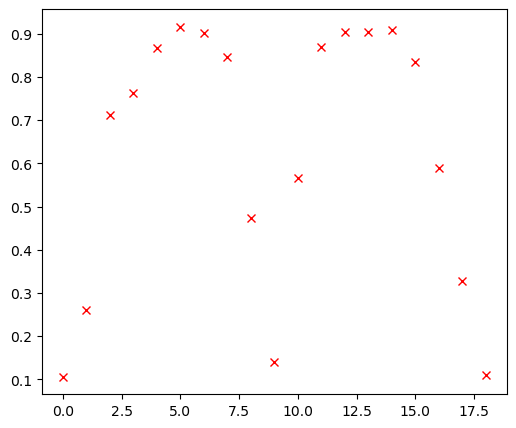

In [62]:
plt.figure(figsize=(6,5))
plt.plot(K, 'rx')
plt.show()